>after checking the data file i see that in order to evaluate and  compare b the movies you have to make relationships between alot of points like the popularity of the movie the actors , runtime and the most wanted revenue not only the audience judgment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [115]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
% matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

>i look at the data set first and then make the fisrt step in data wrangling reading the csv file using pandas and then get the information which will help me in analysis this data and make it more useful 


### General Properties

In [116]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#read the data set
df = pd.read_csv('tmdb-movies.csv')

In [117]:
#print out frist few lines 
df.head()
df.head(5)

#print out the last 5 rows 
df.tail(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [118]:
#describe the dataframe
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [119]:
#display dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [120]:
#display the datatype of the dataframe
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [121]:
#display missing data
df.isnull()

#count the null values
df.isnull().sum()


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

>in this section i'll cleaing my data set in order to consume processing time and get good result of my model 
first i'll drop the duplicated records 
second i'll review the data type of the data set and converting it to the meaningful data type 
i notice that 'budget_adj' and 'revenue_adj' are unreadale columns so i convert it to numbers 
after that i count the missing data and converting each nan data with 'unknown' word in case of using it after that 
i notice that in 'runtime' column thier is zero value and values less than 90 min so i replace the column data with the mean of the column
at the end i dropped some unneccesary colums to consume the proccesing time

### Data Cleaning (Replace this with more specific notes!)

In [122]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#getting only the month from the release_date column

df['release_date'] = pd.to_datetime(df['release_date'])
df["month"] = df['release_date'].dt.month

#drop unneccesary colums to consume the proccesing time
df.drop(['homepage','tagline' , 'imdb_id' , 'budget' , 'overview' ,'keywords', 'release_date' ], axis=1, inplace=True) 

#convert the budget_adj column to understobable number 
# df['budget_adj'] = df['budget_adj'].apply(lambda x: '{:.2f}'.format(x))

#convert the revenue_adj column to understobable number 
# df['revenue_adj'] = df['revenue_adj'].apply(lambda x: '{:.2f}'.format(x))

# #converting every nul data with "unknown" 
# for v in enumerate(df.columns):
#     df[v].fillna('unknown', inplace=True)


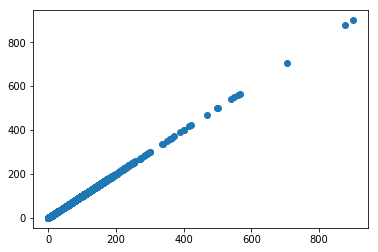

In [123]:
#checking outliers
plt.scatter(df["runtime"],df["runtime"] )


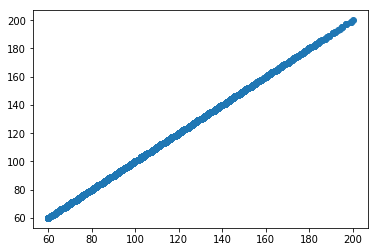

In [124]:
#plotting after removing the outliers
for x,y in enumerate (df['runtime']):
    if (y < 60) | (y > 200) :
        df['runtime'].replace(y,df['runtime'].mean(), inplace = True)
        
plt.scatter(df["runtime"],df["runtime"] )


In [125]:
#find out duplicated data
df.duplicated()

#drop duplicated data
df.drop_duplicates(inplace=True)

In [126]:
#cleaning the rest nan values in data
df.dropna() 

,id,popularity,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
0,135397,32.985763,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.000000,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,6
1,76341,28.419936,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.000000,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,5
2,262500,13.112507,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.000000,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,3
3,140607,11.173104,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.000000,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,12
4,168259,9.335014,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.000000,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,4
5,281957,9.110700,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156.000000,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,3929,7.2,2015,1.241999e+08,4.903142e+08,12
6,87101,8.654359,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125.000000,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2598,5.8,2015,1.425999e+08,4.053551e+08,6
7,286217,7.667400,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141.000000,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,4572,7.6,2015,9.935996e+07,5.477497e+08,9
8,211672,7.404165,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91.000000,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2893,6.5,2015,6.807997e+07,1.064192e+09,6
9,150540,6.326804,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94.000000,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,3935,8.0,2015,1.609999e+08,7.854116e+08,6


In [127]:
#check for zero values
#mean function using numpy
def mean_val (column_name):
    return df[column_name].replace(0, np.mean(df[column_name]))

df['runtime']=  mean_val('runtime')
df['revenue']= mean_val('revenue')


In [128]:
# plt.scatter(df["popularity"],df["revenue_adj"])
# plt.xlabel("pop")
# plt.ylabel("rev")

# df.drop(df[(df['popularity'] > 20) | (df['revenue_adj'] > 2e8)])

#use plotting in order to check for outeliers
df.drop(df.index[df['popularity'] > 10],inplace = True)
df.drop(df.index[df['revenue_adj'] > 2e8],inplace = True)
df.drop(df.index[df['budget_adj'] > 3e8],inplace = True)


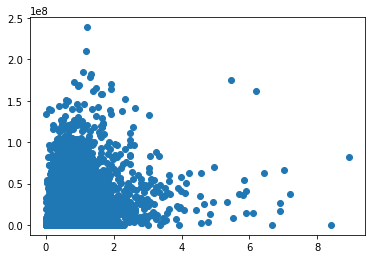

In [129]:
#check for outeliers 
plt.scatter(df["popularity"],df["budget_adj"])

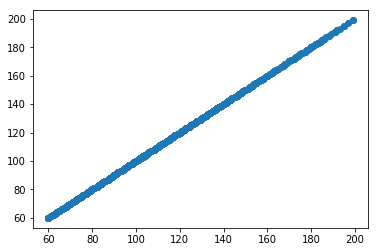

In [130]:
#check for outeliers
plt.scatter(df["runtime"],df["runtime"] )

In [131]:
#splitting the data 
df['cast']=df['cast'].str.replace("|"," ")  
print(df['cast'].head(5))


11    Mila Kunis Channing Tatum Sean Bean Eddie Redm...
12    Domhnall Gleeson Alicia Vikander Oscar Isaac S...
15    Samuel L. Jackson Kurt Russell Jennifer Jason ...
20    Britt Robertson George Clooney Raffey Cassidy ...
21    Jake Gyllenhaal Rachel McAdams Forest Whitaker...
Name: cast, dtype: object


In [132]:
#splitting the data 
df['genres']=df['genres'].str.replace("|"," ")  
print(df['genres'].head(5))


11           Science Fiction Fantasy Action Adventure
12                              Drama Science Fiction
15                        Crime Drama Mystery Western
20    Action Family Science Fiction Adventure Mystery
21                                       Action Drama
Name: genres, dtype: object


<a id='eda'></a>
## Exploratory Data Analysis

>after cleaning my data now i'm gonna to visualizing some relations between columns 

### Research Question 1 (Which genres are most popular from year to year?)

In [133]:
#Which genres are most popular from year to year?
def print_genres_per_year(df):
    years = set(df["release_year"]) 
    for year in years:
        tmp_year = df[df["release_year"] == year]
        tmp_year = tmp_year[tmp_year["popularity"] == tmp_year["popularity"].max()]
        print(str(year) ,tmp_year["genres"].values[0])
        
print_genres_per_year(df)

1960 Action Adventure Western
1961 Comedy Drama Romance
1962 Drama Romance
1963 Animation Family
1964 Drama Comedy War
1965 Comedy Music
1966 Animation Family Comedy
1967 Drama Romance
1968 Horror
1969 Action Adventure Crime Drama
1970 Adventure Science Fiction Mystery
1971 Science Fiction Drama
1972 Action Science Fiction
1973 Animation Family
1974 Crime Drama Mystery Thriller
1975 Adventure Comedy Fantasy
1976 Crime Drama
1977 Comedy Drama Romance
1978 Horror
1979 Comedy
1980 Horror Thriller
1981 Romance Comedy
1982 Science Fiction Drama Thriller
1983 Action Crime Drama Thriller
1984 Action Thriller Science Fiction
1985 Comedy Drama
1986 Adventure Action Fantasy
1987 Science Fiction Action Adventure Thriller
1988 Action Comedy Crime
1989 Comedy Romance Drama
1990 Drama Crime
1991 Action Fantasy Science Fiction
1992 Crime Thriller
1993 Romance Fantasy Drama Comedy
1994 Drama Crime
1995 Drama Crime Thriller
1996 Drama Crime
1997 Comedy
1998 Horror Action
1999 Drama
2000 Mystery Thrille

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?
)

In [134]:
#What kinds of properties are associated with movies that have high revenues?

rearrange_by_revenue = df.sort_values(by='revenue', ascending=False)
# print(rearrange_by_revenue.head(5))

# Action|Thriller|Crime|Mystery genres were the most common in first 5
print(rearrange_by_revenue.head(5)["genres"])   

print(rearrange_by_revenue.head(5)["cast"])

# Daniel Espinosa director has the most common records in the top 5
print(rearrange_by_revenue.head(5)["director"])  

26                                              Comedy
671                    Horror Action Drama Fantasy War
673                               Fantasy Comedy Music
640                                   War Drama Action
20     Action Family Science Fiction Adventure Mystery
Name: genres, dtype: object
26     Mark Wahlberg Seth MacFarlane Amanda Seyfried ...
671    Luke Evans Sarah Gadon Dominic Cooper Art Park...
673    Meryl Streep Emily Blunt James Corden Anna Ken...
640    Brad Pitt Shia LaBeouf Logan Lerman Michael Pe...
20     Britt Robertson George Clooney Raffey Cassidy ...
Name: cast, dtype: object
26     Seth MacFarlane
671         Gary Shore
673       Rob Marshall
640         David Ayer
20           Brad Bird
Name: director, dtype: object


In [135]:
# comedy is the most demanded genre
df['genres']=df['genres'].str.split(" ",expand=True)
df['genres'].value_counts()

Drama          2336
Comedy         2198
Action         1409
Horror          895
Thriller        472
Adventure       440
Documentary     432
Crime           358
Animation       348
Fantasy         235
Science         183
Romance         172
Family          128
Mystery         120
Music            94
TV               78
War              56
Western          39
History          39
Foreign           9
Name: genres, dtype: int64

In [143]:
#find out the popularity of movies by the top directors
sort_by_revenue = df.sort_values(by='popularity',axis=0, ascending=False)
tmp_data = sort_by_revenue.head(5)
print(tmp_data["director"]) 

#MÃ¥ns MÃ¥rlind|BjÃ¶rn Stein have the most popularity amonug the other after sorting

2409                     David Fincher
3371                     Juno John Lee
4178                    Frank Darabont
4362       MÃ¥ns MÃ¥rlind|BjÃ¶rn Stein
638     Alejandro GonzÃ¡lez IÃ±Ã¡rritu
Name: director, dtype: object


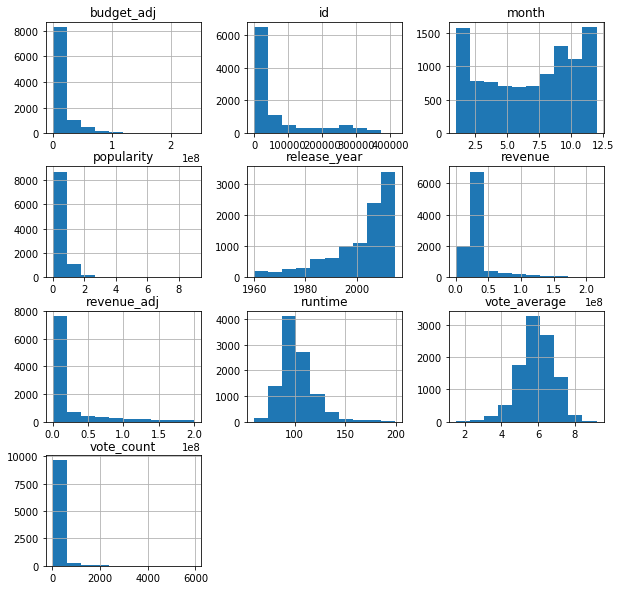

In [137]:
#visualization data 
#exploring some relations through few visualizations
df.hist(figsize=(10,10));

Text(0,0.5,'revenue')

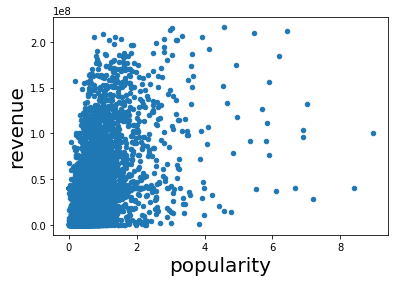

In [138]:
#does the revenue effect on the popularity of the movie 

df.plot(x='popularity', y='revenue', kind='scatter')
plt.xlabel('popularity',fontsize=20)
plt.ylabel('revenue',fontsize=20)

# it seems that revenues increases recently


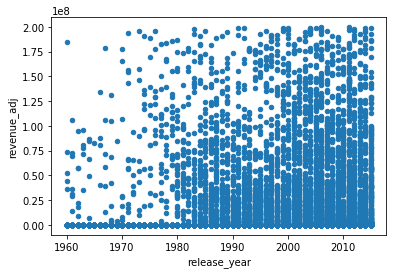

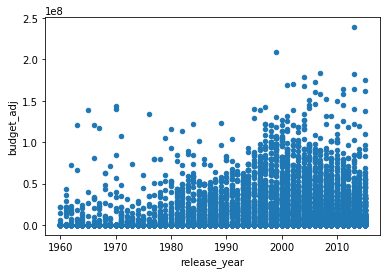

In [139]:
# do revenues as well as budget vary with time?
df.plot(x='release_year', y='revenue_adj', kind='scatter')
df.plot(x='release_year', y='budget_adj', kind='scatter')

# it seems that budgets increases recently

In [140]:
#which year and month have the most product movies
# df.groupby(df["release_year"]).count().plot(kind="bar")
# df.groupby(df["month"]).count().plot(kind="bar")


Text(0,0.5,'runtime')

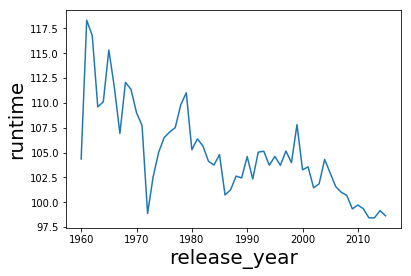

In [141]:
# how is runtime trends over time?
popular_year = df.groupby('release_year')['runtime'].mean()
popular_year.plot(x='release_year', y='runtime')
plt.xlabel('release_year',fontsize=20)
plt.ylabel('runtime',fontsize=20)

# it seems that runtime gets shorter over time 


<a id='conclusions'></a>
## Conclusions

>after all the conclusion of my analysis of this data set is that

>first i look at the data set of the project then i tried to understand it and make relationships between every column and the other 

>then i clean my data set in order to consume processing time and get good result of my model 
>first i'll drop the duplicated records 
>second i'll review the data type of the data set and converting it to the meaningful data type 
>i notice that 'budget_adj' and 'revenue_adj' are unreadale columns so i convert it to numbers 
>after that i count the missing data and converting each nan data with 'unknown' word in case of using it after that 
>i notice that in 'runtime' column thier is zero value and values less than 90 min so i replace the column data with the mean of the column
>at the end i dropped some unneccesary colums to consume the proccesing time

>after all i 
>1-Drama movies is the most popular gener amoung all
>2-Colin Trevorrow has the higher popularity among other directors
>3- from 2001:2005 only "Adventure Fantasy Family" has been produce 
>4- thier is some outliers data 

>one of the limitation i found on my data set is the conssuming time as when i plot the relation between 'popularity' and 'budjet_adj' and 'revenue_adj' it take alot of time as i was conerting the e numbers to number

>aslo dropping the unnescessary columns that won't help me during my analysis and to decrease the runtime of my code

>splitting data in order to get the name cleared 

> i see that after cleaing data set the dataset became more sufficient to analysis

>the size of the data set in the beggining wasnot good enough to my analysis as it's take more consuming time but after cleaning and dropping the nan and zeros data i guess it's became more reliable 

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [142]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0